In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [116]:
titanic_data = pd.read_csv('titanic/train.csv')

In [117]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [120]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [121]:
y = titanic_data.Survived

In [122]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [123]:
X = pd.get_dummies(X)

In [124]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [125]:
X = X.fillna({'Age': X.Age.median()})

In [126]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [127]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [128]:
#graph = Source(tree.export_graphviz(clf, out_file=None
#                , feature_names=list(X), class_names=['Died', 'Survived']
#                , filled=True))
#display(SVG(graph.pipe(format='svg')))

In [129]:
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20,10))
#plot_tree(clf,filled=True, fontsize=1)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [133]:
clf.score(X_train, y_train)

0.9798657718120806

In [134]:
clf.score(X_test, y_test)

0.7694915254237288

In [135]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [136]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [137]:
clf.score(X_train, y_train)

0.8238255033557047

In [138]:
clf.score(X_test, y_test)

0.8203389830508474

### 2.4 lesson

In [160]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])


In [161]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [162]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [170]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.795322
206,9,cross_val_score,0.805392
207,10,cross_val_score,0.802031


In [164]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

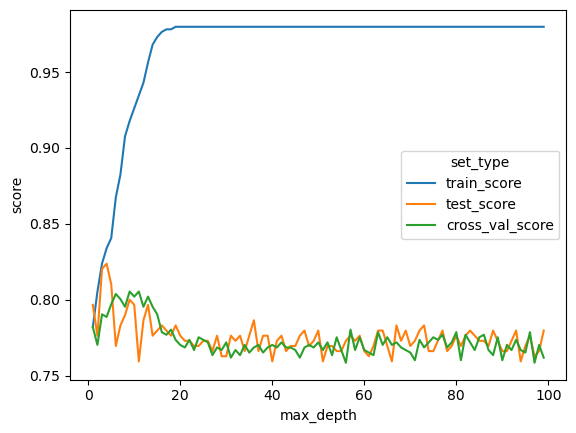

In [165]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [157]:
from sklearn.model_selection import cross_val_score

In [185]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [188]:
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.7986694677871148